In [1]:
%%javascript
require(["codemirror/keymap/sublime", "notebook/js/cell", "base/js/namespace"],
    function(sublime_keymap, cell, IPython){
        cell.Cell.options_default.cm_config.keyMap = 'sublime';
        var cells = IPython.notebook.get_cells();
        for(var cl=0; cl< cells.length ; cl++){
            cells[cl].code_mirror.setOption('keyMap', 'sublime');
        }
    }
);

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pip install git+https://github.com/demetriomagatti/bioinformatics_basics.git@main

  Cloning https://github.com/demetriomagatti/bioinformatics_basics.git (to revision main) to /tmp/pip-req-build-dfvy3plw
  Running command git clone -q https://github.com/demetriomagatti/bioinformatics_basics.git /tmp/pip-req-build-dfvy3plw
Note: you may need to restart the kernel to use updated packages.


### Example

In [4]:
from bioinformatics_basics import alignment
solver = alignment.ManhattanSolver(nrows=5,ncols=5,MaxScore=10)

Initialized module


In [5]:
# matrix containing scores for "to nord" movements
solver.MoveNord

array([[1., 5., 2., 1., 2.],
       [6., 7., 1., 2., 8.],
       [0., 2., 4., 8., 6.],
       [7., 2., 4., 9., 0.]])

In [6]:
# matrix containing scores for "to east" movements
solver.MoveEast

array([[5., 3., 2., 9.],
       [8., 3., 3., 4.],
       [7., 1., 9., 0.],
       [4., 7., 6., 1.],
       [3., 1., 5., 4.]])

In [7]:
# matrix containing maximum score to a vertex - empty before running
solver.Score

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [8]:
# moves to maximize score to a vertex - empty before running
solver.Moves

{}

In [9]:
solver.run()

In [10]:
# matrix containing maximum score to a vertex
solver.Score

array([[ 0.,  5.,  8., 10., 19.],
       [ 1., 10., 13., 16., 21.],
       [ 7., 17., 18., 27., 29.],
       [ 7., 19., 26., 35., 36.],
       [14., 21., 30., 44., 48.]])

In [11]:
# moves to maximize score to the final vertex
solver.Moves[list(solver.Moves.keys())[-1]]

['East', 'Nord', 'Nord', 'East', 'East', 'Nord', 'Nord', 'East']

<AxesSubplot:>

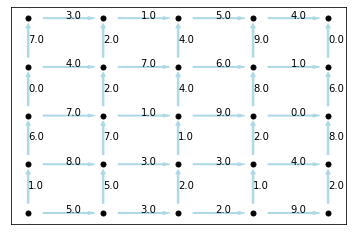

In [12]:
# visual check
solver.visualize()